**Introduction to Machine Learning**

**Notes**
- Supervised, Unsupervised, Reinforcement and Generative models
- Under supervised we have Regression (numerical) and Classification (probablity)
- Data sets have features and labels (answers)
- In Linear Regression, weight and bias is calculated by the model. Loss is difference between actual and predicted values and can be calculated as MSE or MSA. Usually MSE is better aligned to data sets.
- Gradient descent is iterative process for model to find best weight and bias to minimize loss. When loss curve converge and are convex in surface shape against wieght and bias.
- Hyperparameters are values that you control; parameters are values that the model calculates during training. Learning rate, epochs, Batch size
- Learning rate shows how quickly or how much step increment model makes each time. Determines magnitude of changes to make.

In [3]:
!pip install google-ml-edu==0.1.3 \
keras~=3.8.0 \
matplotlib~=3.10.0 \
numpy~=2.0.0 \
pandas~=2.2.0 \
tensorflow~=2.18.0
print( '\n I am done')

# this installs libraries, numbers are versions
# !pip is python package installer program \ is added so next line is treated as part of the same command
# keras: high level deep learning API for neural networks, simple ways to define models
# matplotlib: python plotting library
# numpy: core numerical computing library, arrays, matrices, fast math operations, relied on by tensorflow, pandas, scikit etc.
# pandas: data analysis library, handles data and series, tabular data, for data science workflows
# tensorflow: deep learning framework, can train neural networks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.6/615.6 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.18.1 which

In [4]:
import numpy as np
import pandas as pd

import keras
import ml_edu.experiment
import ml_edu.results

import plotly.express as px

# gives aliases to libraries, plotly.express is high level plotting API for interactive charts

In [5]:
ctd=pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

# pd.read_csv("url") is pandas function to read csv file into variable

In [7]:
td=ctd.loc[:,('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY','PAYMENT_TYPE', 'TIP_RATE')]
print('Total rows : {0} \n\n'.format(len(td.index)))
td.head(200)

# .loc[] pandas label/name based indexer. puts only selected coloums in new dataset variable
# .format() {0} gets replaces by number of rows
# len() gives number of rows
# .index represents row labels
# .head(n) returns first n rows of dataframe

Total rows : 31694 




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


In [ ]:
td.describe(include='all')

# .describe() pandas method to summarize data stastically

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [12]:
max=td['FARE'].max()
print("max fare: {fare}".format(fare = max))

mean=td['TRIP_MILES'].mean()
print("mean distance: {dis}".format(dis=mean))


max fare: 159.25
mean distance: 8.289462674323214


In [15]:
td.corr(numeric_only = True)
# .corr() pandas method to calculate pairwise correlation between coloums
# only evaluates numeric values



,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


In [16]:
px.scatter_matrix(td, dimensions=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

# .scatter_matrix() creates scatter plot matrix, takes numeric coloums, plots every possible pair, dimensions tells only 3 coloums to be included


In [19]:
def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:

  inputs = {name: keras.Input(shape=(1,), name=name) for name in settings.input_features}
  concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
  outputs = keras.layers.Dense(units=1)(concatenated_inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                loss="mean_squared_error",
                metrics=metrics)

  return model

'''
function takes settings, an object of type experimentsettings from edu experiemnt
takes metrics, list of keras metric objects to track during training
returns a compiled keras model

Creates and compiles a simple linear regression model

inputs line is a dictionary comprehension. loops over settings input features and maps
each feature name to a Keras Input opbject


keras.layers.Concatenate() — constructs a Concatenate layer object (a layer that stacks tensors along the last axis).



'''


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:

  features = {name: dataset[name].values for name in settings.input_features}
  label = dataset[label_name].values
  history = model.fit(x=features,
                      y=label,
                      batch_size=settings.batch_size,
                      epochs=settings.number_epochs)

  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1053.7899 - rmse: 32.4419
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 628.5248 - rmse: 25.0529
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 323.2443 - rmse: 17.9503
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 122.4627 - rmse: 11.0242
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.3345 - rmse: 5.2006
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.0687 - rmse: 3.8755
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.9230 - rmse: 3.7227
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.4647 - rmse: 3.6634
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.7328 - rmse: 3.7030
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.2240 - rmse: 3.7667
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.7221 - rmse: 3.7008
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.5382 - rmse:

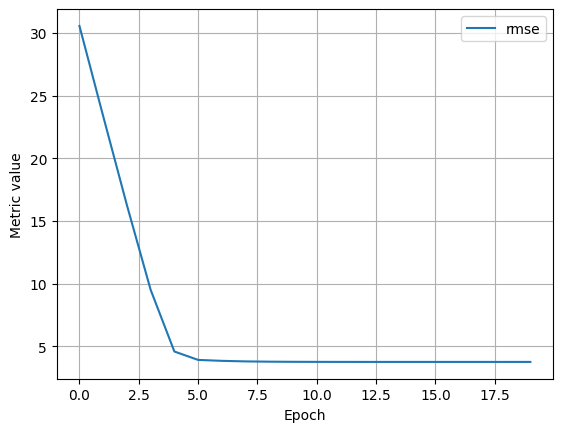

In [20]:
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, td, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, td, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 91.3330 - rmse: 9.4158
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.7501 - rmse: 4.8724
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.7260 - rmse: 4.2077
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.2130 - rmse: 3.7657
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.2645 - rmse: 3.8631
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12.6401 - rmse: 3.5496
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.0626 - rmse: 3.4693
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.5440 - rmse: 3.6721
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.6620 - rmse: 3.8192
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.5481 - rmse: 3.5306
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.6080 - rmse: 3.3969
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.6318 - rmse: 3.5470
E

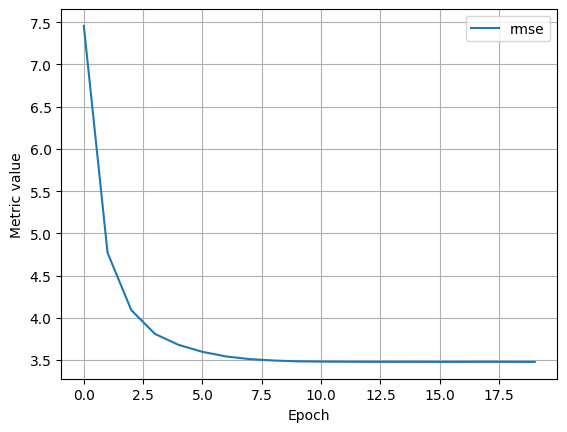

In [21]:
settings_3 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES', 'TRIP_MINUTES']
)

td['TRIP_MINUTES'] = td['TRIP_SECONDS']/60

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_3 = create_model(settings_3, metrics)

experiment_3 = train_model('two_features', model_3, td, 'FARE', settings_3)

ml_edu.results.plot_experiment_metrics(experiment_3, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_3, td, 'FARE')

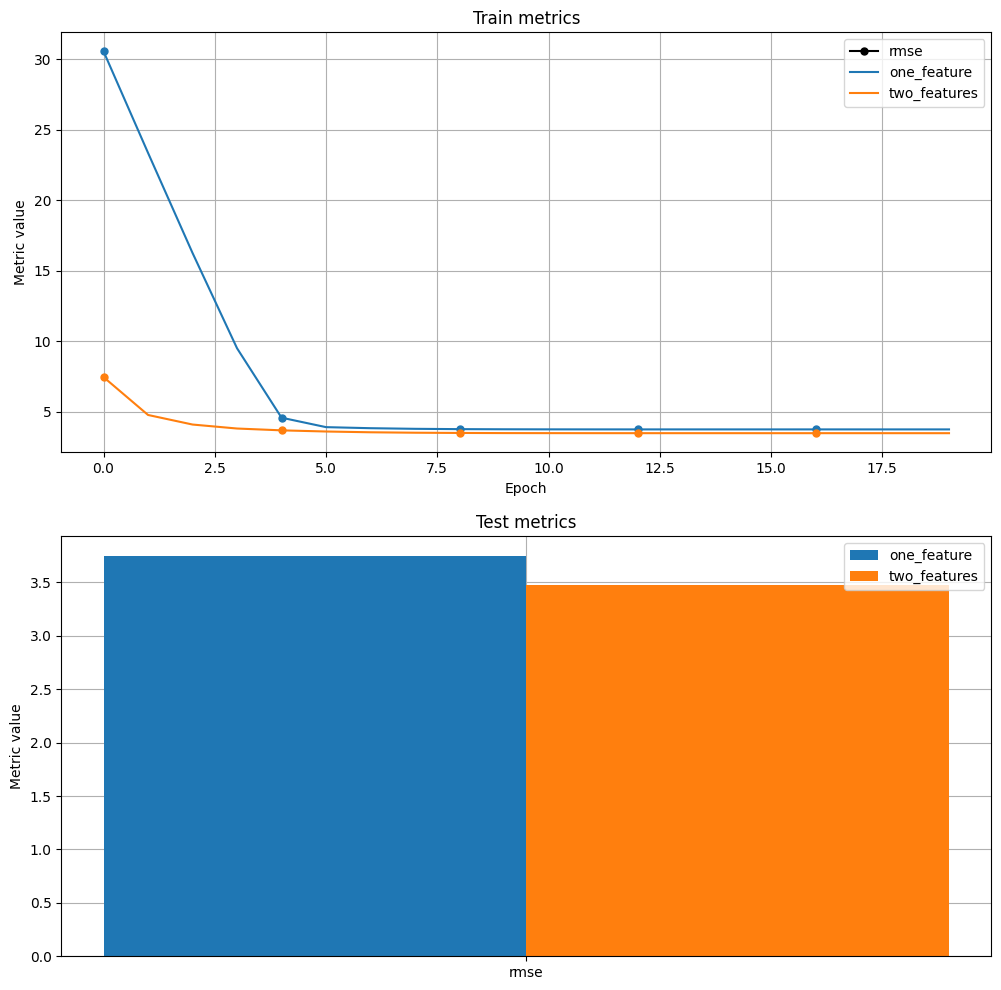

In [22]:
ml_edu.results.compare_experiment([experiment_1, experiment_3], ['rmse'], td, td['FARE'].values)

In [23]:
def format_currency(x):
  return "${:.2f}".format(x)

def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.set_index(np.arange(batch_size), inplace=True)
  return batch

def predict_fare(model, df, features, label, batch_size=50):
  batch = build_batch(df, batch_size)
  predicted_values = model.predict_on_batch(x={name: batch[name].values for name in features})

  data = {"PREDICTED_FARE": [], "OBSERVED_FARE": [], "L1_LOSS": [],
          features[0]: [], features[1]: []}
  for i in range(batch_size):
    predicted = predicted_values[i][0]
    observed = batch.at[i, label]
    data["PREDICTED_FARE"].append(format_currency(predicted))
    data["OBSERVED_FARE"].append(format_currency(observed))
    data["L1_LOSS"].append(format_currency(abs(observed - predicted)))
    data[features[0]].append(batch.at[i, features[0]])
    data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))

  output_df = pd.DataFrame(data)
  return output_df

def show_predictions(output):
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

In [24]:
output = predict_fare(experiment_3.model, td, experiment_3.settings.input_features, 'FARE')
show_predictions(output)

--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_FARE OBSERVED_FARE L1_LOSS  TRIP_MILES TRIP_MINUTES
0          $27.74        $28.50   $0.76        9.88        25.75
1           $6.24         $6.25   $0.01        0.60         8.00
2          $10.04        $10.00   $0.04        2.00        14.47
3           $6.69         $6.50   $0.19        0.93         6.55
4          $40.34        $40.75   $0.41       16.02        26.53
5          $18.65        $19.16   $0.51        5.84        19.85
6           $9.44        $10.49   $1.05        2.13         8.65
7          $36.36        $37.00   $0.64       12.59        46.67
8          $35.21        $35.25   $0.04       13.90        21.00
9          $15.56        $15.50   $0.06        4.60        16.00
10         $35.49        $35.50   $0.01   